# Librerías necesarias

In [0]:
#Detección de Fraude Bancario de Tarjetas de crédito/débito

# Desarrollado: Andrés Soriano
# Comunidad: 
# Licencia: MIT

In [0]:
# !sudo pip3 install imblearn
# !sudo pip3 install xgboost
# !sudo pip3 install -U imbalanced-learn
# !pip3 install fastai==0.7.0 
# git init
# git add .
# git commint -m "...."
# git tag -a v1.0 -m "my version 1.0"
# git remote add origin https://github.com/.......
# git push -u origin v1.0

In [0]:
# !pip3 install scipy

In [0]:
#recarga odulos externos
#realiza los gráfico sen la misma linea
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math

In [0]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [0]:
from fastai.vision import *

In [0]:
from fastai.imports import *
#from fastai.structured import *
#from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
#from sklearn import metrics 

In [0]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from pylab import rcParams

In [0]:
#Se cargan librerías para balancerar datos 
#sudo conda install -c conda-forge imbalanced-learn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier

In [0]:
# con esta librería se cuentan los datos contenidos en un arreglo y presenta el resultado en un diccionario
from collections import Counter

In [0]:
#conda install -c conda-forge xgboost
import xgboost

In [0]:
#se usa para importar el DataSet desde GoogleDrive
from google.colab import drive

Crear carpeta

In [0]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Se carga el DataSet
ftc = pd.read_csv("drive/My Drive/Fraude Bancario/creditcard.csv")

In [0]:
ftc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
ftc.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [0]:
ftc.Time.shape, ftc.Amount.shape 

((284807,), (284807,))

[0, 173000, 0, 10000]

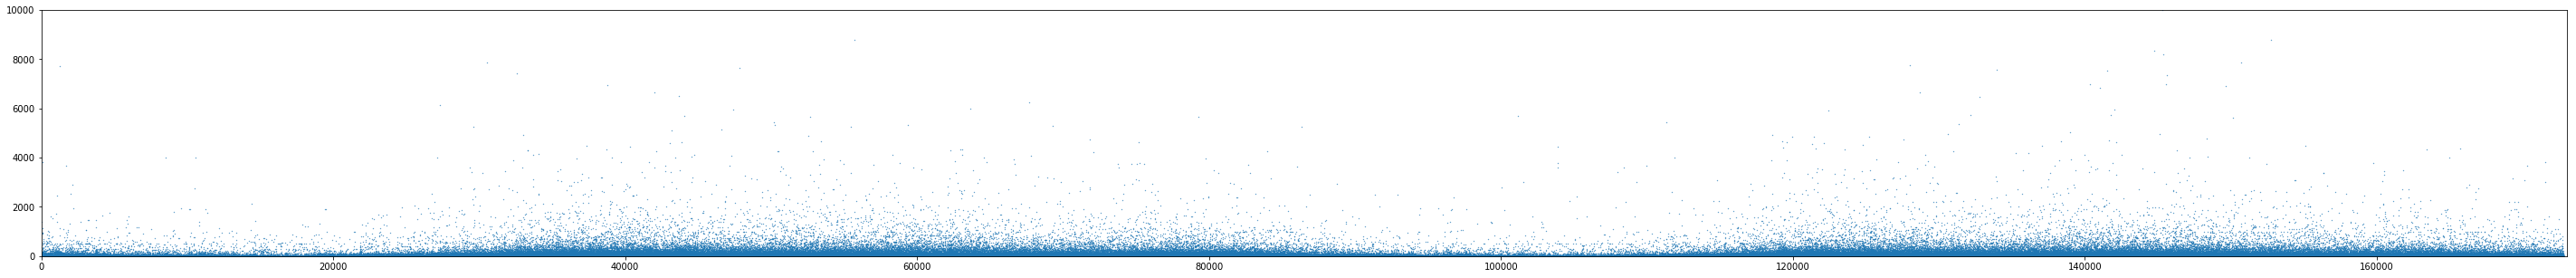

In [0]:
#comporatmiento de las transacciones en t [0, 10000)
#parametro s representa el zoom de los datos graficados
plt.figure(figsize=(50,5))
plt.scatter(ftc.Time[1:], ftc.Amount[1:], s=0.1)
plt.axis([0, 173000, 0, 10000])

Text(0, 0.5, 'Number of Observations')

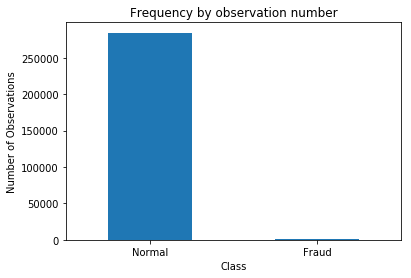

In [0]:
count_classes = pd.value_counts(ftc.Class, sort = True) # se cuentan lso valores de la columna Class y se almacenan en count_class
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), ('Normal', 'Fraud'))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [0]:
#verificamos la cantidad de datos Fraudulento y No Fraudulentos
pd.value_counts(ftc.Class, sort = True)

0    284315
1       492
Name: Class, dtype: int64

In [0]:
#porcentaje de fraudes
fraud_porcent = (492/(492+284315))*100
print(round(fraud_porcent,2),"%")

0.17 %


In [0]:
#Separamos los las variables Independientes (x) y las dependientes (y)
x = ftc.loc[:, ftc.columns!='Class']
y = ftc.loc[:, 'Class']

In [0]:
#verificamos
x.shape, y.shape, ftc.shape

((284807, 30), (284807,), (284807, 31))

In [0]:
#utilizamos el 50% de los datos para entrenar
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state = 1)

In [0]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [0]:
#el 50% restante se dividirá en test(25%) y valid(25%) 
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, train_size=0.5, random_state = 1)

In [0]:
x_test.shape, x_valid.shape, y_test.shape, y_valid.shape

((71202, 30), (71202, 30), (71202,), (71202,))

# Regresión logistica con penalización

In [0]:
#con esta función tuneamos y entrenamos con el modelo de regresión logistica
def reg_logistica_model(x_train, y_train):
    #"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000] #paremetros de regularización para evitar sobreajuste
    #param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l2"]} #para metros para validación cruzada
    
    #con class_weight="balanced" el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento
    reg_logistic = LogisticRegression(C=10, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")
    
    #clf= GridSearchCV(reg_logistic, param_grid, cv=5) #se realiza una validación cruzada por cada valor de C de param_grid
   # clf.fit(x_train, y_train)
    reg_logistic.fit(x_train, y_train)
    return reg_logistic

In [0]:
#indicadores de rendimiento
#indicadores de rendimiento
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ("Regresión Logistica con Penalización")
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )

In [0]:
ftc_reglog = reg_logistica_model(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

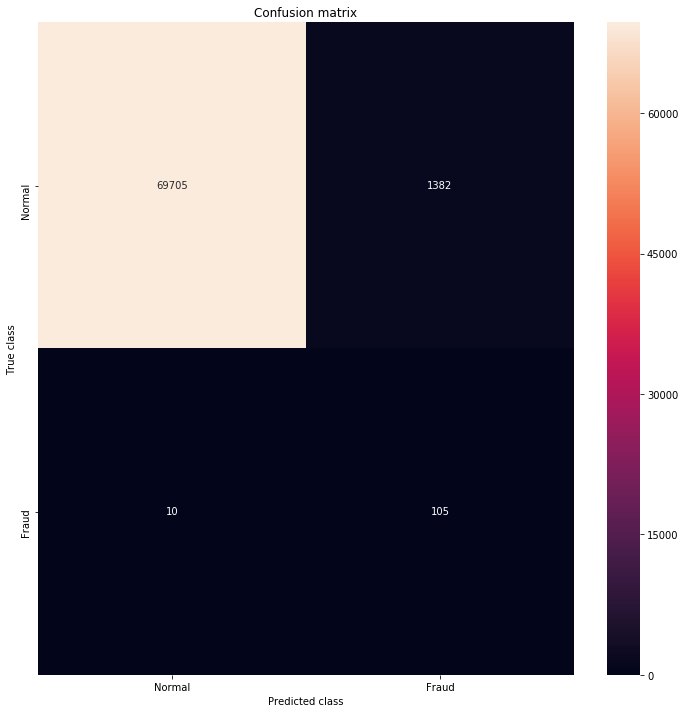

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71087
           1       0.07      0.91      0.13       115

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202



0    71087
1      115
Name: real, dtype: int64 

0    69715
1     1487
Name: pred, dtype: int64 



In [0]:
y_pred_reglog = ftc_reglog.predict(x_test)#predecimos los datos
ftc_represent(y_test, y_pred_reglog)

In [0]:
roc_auc_score(y_test, y_pred_reglog)

0.9468012557790485

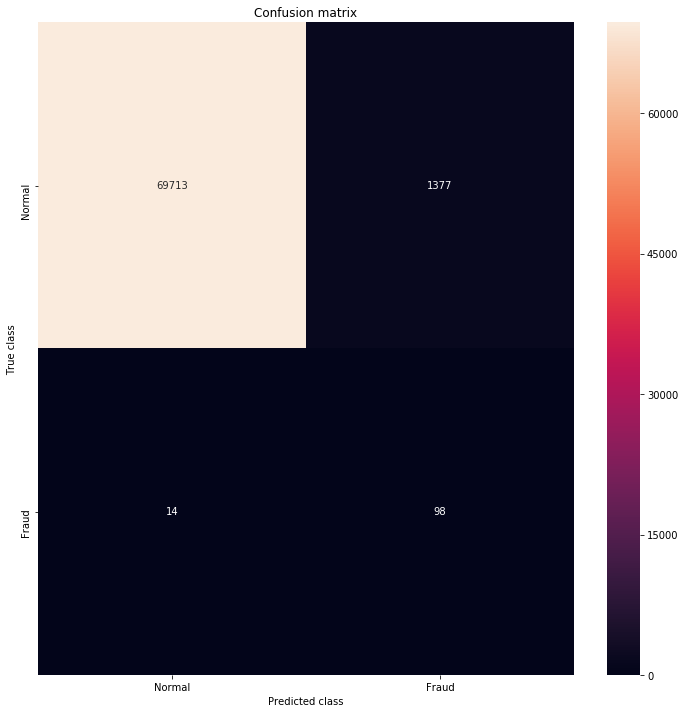

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71090
           1       0.07      0.88      0.12       112

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



0    71090
1      112
Name: real, dtype: int64 

0    69727
1     1475
Name: pred, dtype: int64 



In [0]:
y_pred_reglog_valid = ftc_reglog.predict(x_valid)#predecimos los datos
ftc_represent(y_valid, y_pred_reglog_valid)

In [0]:
roc_auc_score(y_valid, y_pred_reglog_valid)

0.9278150935433956

# Ensambling XGBOOST

In [0]:
def ensambling_model_xgb(x_train, y_train):
    
    clf = BalancedBaggingClassifier(base_estimator=xgboost.XGBClassifier(),
                                sampling_strategy='all',
                                replacement=False,
                                random_state=0)
    clf.fit(x_train, y_train)
    return clf

In [0]:
def ftc_represent(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=('Normal', 'Fraud'), yticklabels=('Normal', 'Fraud'), annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ("XBOOST con Método Ensambling")
    print (classification_report(y_test, y_pred)) 
    print("\n")
    cmp_fraud = pd.DataFrame({'real': y_test,'pred': y_pred})
    print(pd.value_counts(cmp_fraud.real, sort = True), "\n" )
    print(pd.value_counts(cmp_fraud.pred, sort = True), "\n" )

In [0]:
xgb_ensambling = ensambling_model_xgb(x_train, y_train)

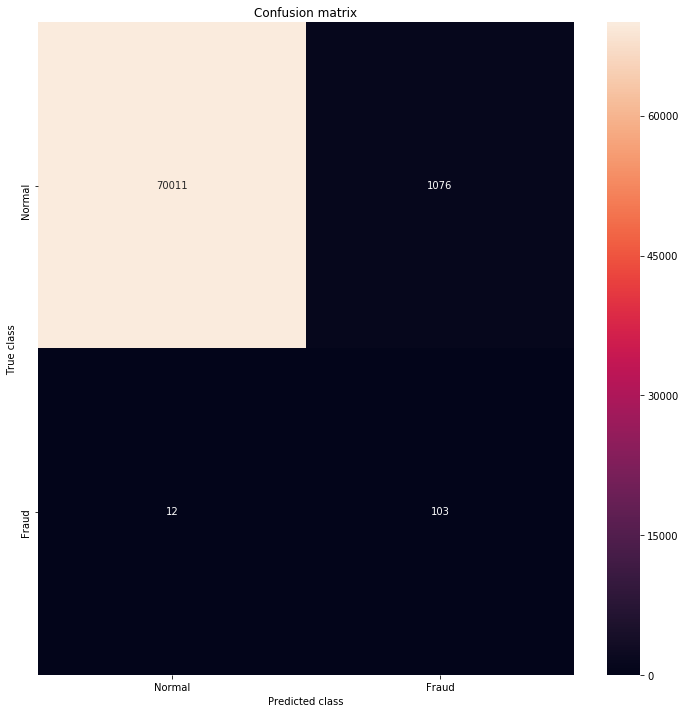

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71087
           1       0.09      0.90      0.16       115

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202



0    71087
1      115
Name: real, dtype: int64 

0    70023
1     1179
Name: pred, dtype: int64 



In [0]:
y_pred_exgb = xgb_ensambling.predict(x_test)
ftc_represent(y_test, y_pred_exgb)

In [0]:
roc_auc_score(y_test, y_pred_exgb)

0.9402578958667304

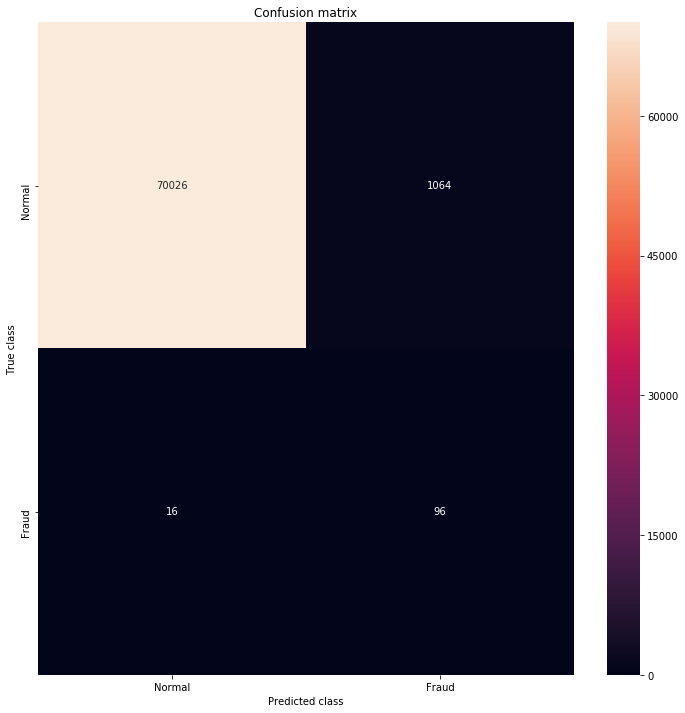

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71090
           1       0.08      0.86      0.15       112

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



0    71090
1      112
Name: real, dtype: int64 

0    70042
1     1160
Name: pred, dtype: int64 



In [0]:
y_pred_exgb_valid = xgb_ensambling.predict(x_valid)
ftc_represent(y_valid, y_pred_exgb_valid)

In [0]:
roc_auc_score(y_valid, y_pred_exgb_valid)

0.9210879569157808

# Random Forest Ensambling Method

In [0]:
def ensambling_model_rf(x_train, y_train):
    
    clf = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
    clf.fit(x_train, y_train)
    return clf

In [0]:
rf_ensambling = ensambling_model_rf(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

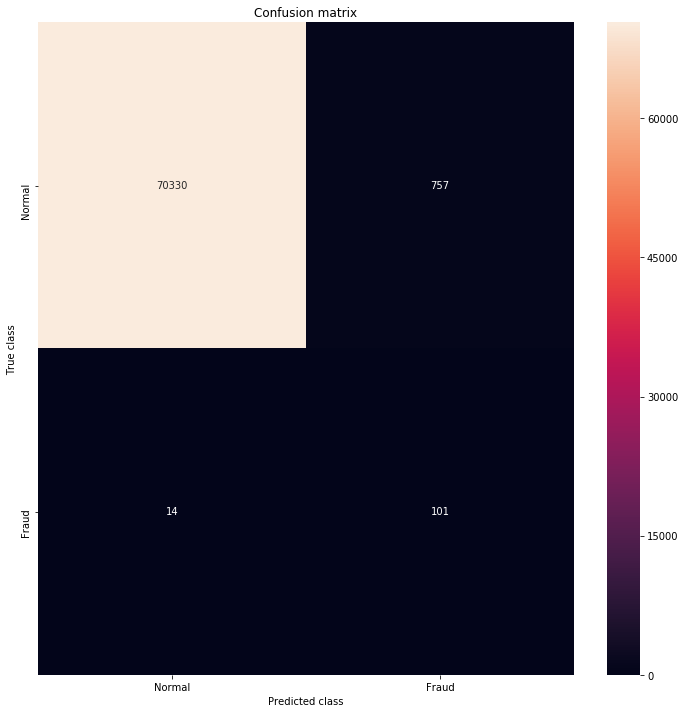

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71087
           1       0.12      0.88      0.21       115

    accuracy                           0.99     71202
   macro avg       0.56      0.93      0.60     71202
weighted avg       1.00      0.99      0.99     71202



0    71087
1      115
Name: real, dtype: int64 

0    70344
1      858
Name: pred, dtype: int64 



In [0]:
y_pred_rf = rf_ensambling.predict(x_test)
ftc_represent(y_test, y_pred_rf)

In [0]:
roc_auc_score(y_test, y_pred_rf)

0.9338059732073559

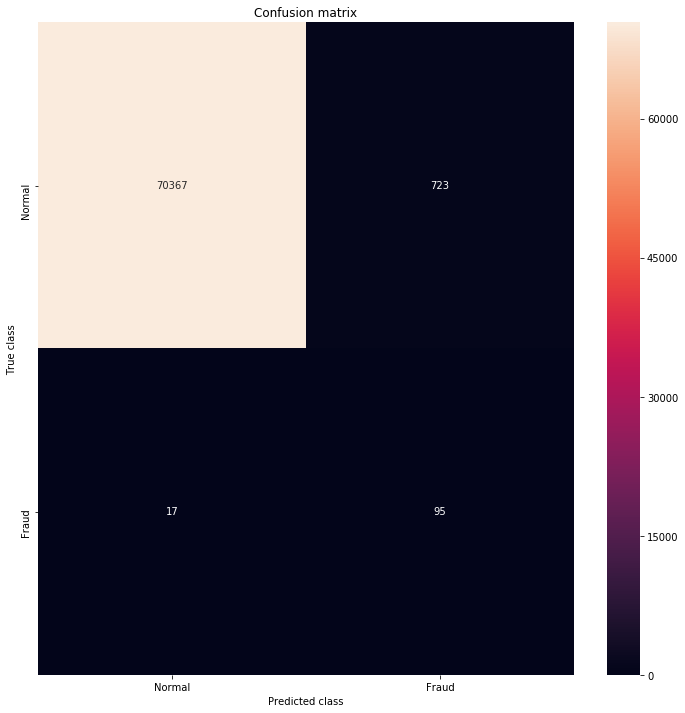

XBOOST con Método Ensambling
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71090
           1       0.12      0.85      0.20       112

    accuracy                           0.99     71202
   macro avg       0.56      0.92      0.60     71202
weighted avg       1.00      0.99      0.99     71202



0    71090
1      112
Name: real, dtype: int64 

0    70384
1      818
Name: pred, dtype: int64 



In [0]:
y_pred_rf_valid = rf_ensambling.predict(x_valid)
ftc_represent(y_valid, y_pred_rf_valid)

In [0]:
roc_auc_score(y_valid, y_pred_rf_valid)

0.919022039467074